In [1]:
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
%matplotlib inline
import folium
from folium.plugins import MarkerCluster 
from wordcloud import WordCloud, STOPWORDS
#print ('Wordcloud is installed and imported!')
import numpy as np
from PIL import Image

In [2]:
df = pd.read_csv('museums.csv',low_memory=False)
#зчитати дані з датасету

In [3]:
df.head(5)
#продемонструвати перші 5 рядків зі зчитанної інформації

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,61.16890,-149.76708,4.0,20.0,2.0,6,920115504,201312.0,1379576.0,1323742.0
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,...,60.56149,-151.21598,3.0,122.0,2.0,6,921761906,201312.0,740030.0,729080.0
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,214 BIRCH STREET,KENAI,AK,99611,...,60.56280,-151.26597,3.0,122.0,2.0,6,920165178,201412.0,0.0,0.0
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0


In [4]:
df.columns
#назви всіх колонок

Index(['Museum ID', 'Museum Name', 'Legal Name', 'Alternate Name',
       'Museum Type', 'Institution Name',
       'Street Address (Administrative Location)',
       'City (Administrative Location)', 'State (Administrative Location)',
       'Zip Code (Administrative Location)',
       'Street Address (Physical Location)', 'City (Physical Location)',
       'State (Physical Location)', 'Zip Code (Physical Location)',
       'Phone Number', 'Latitude', 'Longitude', 'Locale Code (NCES)',
       'County Code (FIPS)', 'State Code (FIPS)', 'Region Code (AAM)',
       'Employer ID Number', 'Tax Period', 'Income', 'Revenue'],
      dtype='object')

<AxesSubplot: title={'center': 'Quantity of museums'}, xlabel='Museum Type'>

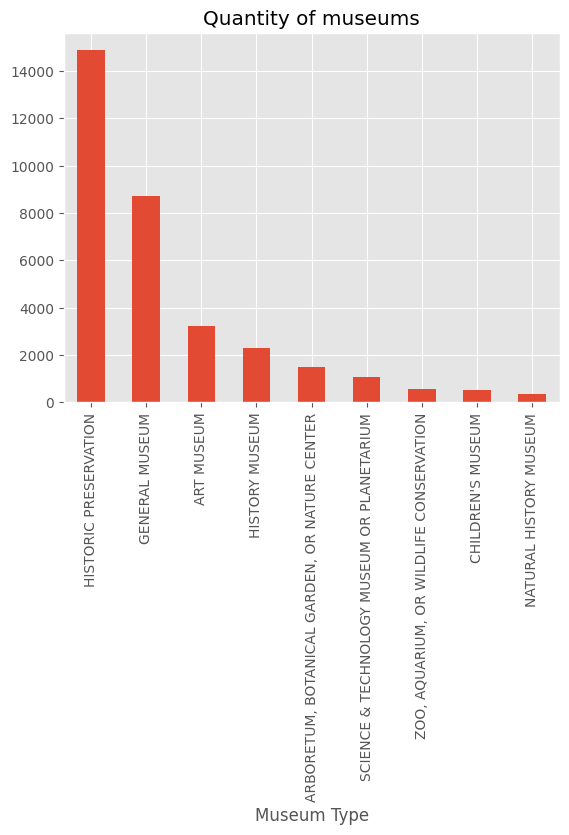

In [5]:
#df['Museum Type'].value_counts()
#згрупуємо музеї за їхнім типом, щоб визначити який з типів переважає за кількістю
df.groupby(by=['Museum Type'])['Museum Type'].count().sort_values(ascending=False).plot(kind="bar",title="Quantity of museums")
#з графіку стає видно, що найбільше організовано музеїв збереження спадків історії

<AxesSubplot: title={'center': 'Total income of each type of museum'}>

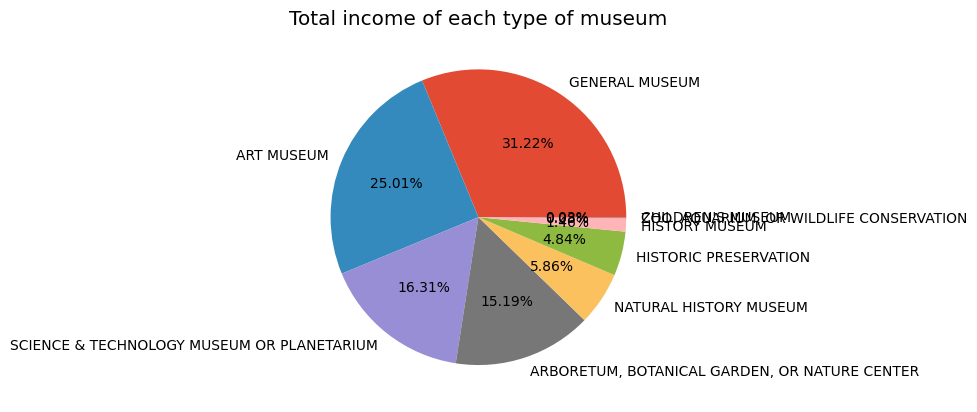

In [6]:
# згрупуємо музеї за прибутком для кожного типу музею
df.groupby(by=['Museum Type'])['Income'].sum().sort_values(ascending=False).plot(label="", kind="pie", autopct='%1.2f%%', title = "Total income of each type of museum")

In [7]:
df.shape
NY_df = df[df['State Code (FIPS)'] == 36]
NY_df.shape
#відфільтруємо дані так, щоб залишалися тільки музеї Н.ю-Йорку p 33072-x рядків даних лишається 2254

(2254, 25)

In [8]:
NY_df_coord = NY_df.dropna(axis = 0, subset=['Latitude', 'Longitude'], how =  'any')
NY_df_coord.shape
# Викинемо ті музеї, в яких не вказані дані його місцезнаходження

(2250, 25)

In [9]:

NY_map = folium.Map(location=[41.6, -77.42], zoom_start=7)
# Створимо екземпляр кластерів з маркерами для всіх музеів в датафреймі
museums = MarkerCluster().add_to(NY_map)

for index, museum in NY_df_coord.iterrows():
    folium.Marker(location = [museum["Latitude"], museum["Longitude"]], popup=museum["Museum Name"]).add_to(museums)
#додаємо до обєкту кластерів маркери кожного музею з їх координатами та назвами

#NY_df_coord.reset_index(inplace=True)
#for ind in range(len(NY_df_coord)):
#    folium.Marker(location = [NY_df_coord["Latitude"][ind], NY_df_coord["Longitude"][ind]], popup = NY_df_coord["Museum Name"][ind]).add_to(museums)

NY_map.add_child(museums)


# РООБОТА З ХМАРОЮ СЛІВ

In [10]:
stopwords = set(STOPWORDS)
# створюємо екземпляр об'єкта WordCloud
johnny_depp_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)
#зчитуємо текст, за основу взято статтю про Джонні Деппа з Вікіпедії
johnny_depp = open("john_depp.txt", 'r').read()
# згенеруйте хмару слів
johnny_depp_wc.generate(johnny_depp)

FileNotFoundError: [Errno 2] No such file or directory: 'john_depp.txt'

In [ ]:
fig = plt.figure()
fig.set_figwidth(14) # встановити ширину рисунку
fig.set_figheight(18) # встановити висоту рисунку
plt.imshow(johnny_depp_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#додамо до стоп-слів ,,Depp,, 
stopwords.add('Depp') 
#створюємо об.єкт хамри слів заново з новим доданим стоп-словом
johnny_depp_wc.generate(johnny_depp)

# візуалізація нової хмари слів
fig = plt.figure()
fig.set_figwidth(14) # встановіть ширину
fig.set_figheight(18) # встановіть висоту

plt.imshow(johnny_depp_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#накладемо на створену хмару слів маску 
jack_sparrow_mask = np.array(Image.open('pirate.png'))
fig = plt.figure()
print('Image downloaded and saved!')
plt.imshow(jack_sparrow_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:

johnny_depp_wc = WordCloud(background_color='white', max_words=2000, mask=jack_sparrow_mask, stopwords=stopwords)
johnny_depp_wc.generate(johnny_depp)

fig.set_figwidth(14) # встановлюємо ширину
fig.set_figheight(16) # встановлюємо висоту

fig = plt.figure()
plt.imshow(johnny_depp_wc, interpolation='bilinear')
plt.axis('off')
plt.show()